In [10]:
pip install librosa

     -------------------------------------- 253.7/253.7 kB 5.2 MB/s eta 0:00:00
     ------------------------------------- 184.6/184.6 kB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
import librosa
x, sr = librosa.load(r"C:\Users\Anusha\Downloads\Breathing-sound.wav")

In [18]:
print(sr)

22050


C:\Users\Anusha\AppData\Local\Temp\ipykernel_25824\3594396806.py:8: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib inline')


Text(0, 0.5, 'Amplitude')

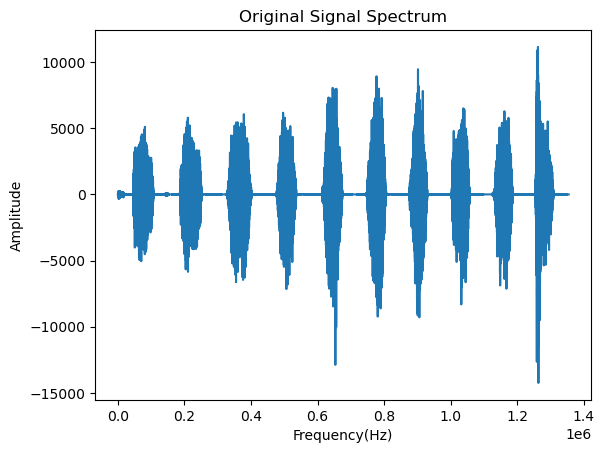

In [44]:
import numpy as np  
import scipy as sp  
from scipy.io.wavfile import read  
from scipy.io.wavfile import write 
from scipy.fftpack import fft
from scipy import signal  
import matplotlib.pyplot as plt  
get_ipython().magic('matplotlib inline')  

(Frequency1, array) = read(r'C:\Users\Anusha\Downloads\Breathing-sound.wav')  

len(array)  

plt.plot(array)   
plt.title('Original Signal Spectrum')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  



C:\Users\Anusha\AppData\Local\Temp\ipykernel_25824\915091374.py:3: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  scale = sp.linspace(0, Frequency, len(array))


Text(0, 0.5, 'Amplitude')

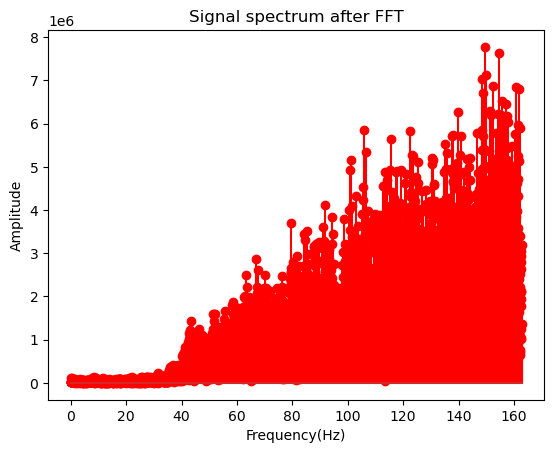

In [45]:
FourierTransformation = fft(array)  

scale = sp.linspace(0, Frequency, len(array))  

plt.stem(scale[0:5000], np.abs(FourierTransformation[0:5000]), 'r')    
plt.title('Signal spectrum after FFT')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  




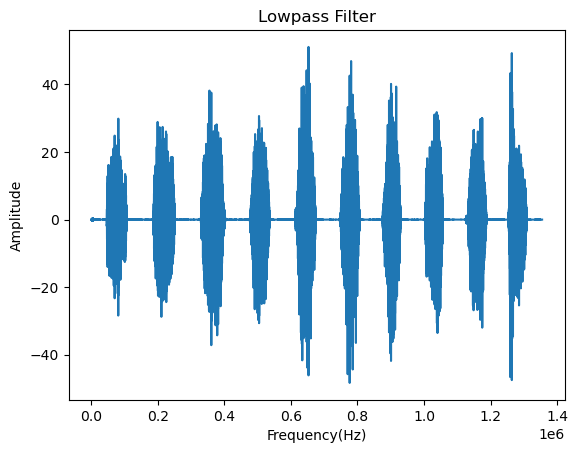

In [48]:
c,d = signal.butter(5, 380/(Frequency1/2), btype='lowpass') # ButterWorth low-filter  
newFilteredSignal = signal.lfilter(c,d,filteredSignal) # Applying the filter to the signal  
plt.plot(newFilteredSignal) # plotting the signal.  
plt.title('Lowpass Filter')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  

write("New-Filtered-Sound.wav", Frequency, newFilteredSignal)  

In [50]:
x, sr = librosa.load('New-Filtered-Sound.wav')
sr

22050

In [54]:
#!/usr/bin/env python

import librosa
import sys
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

np.set_printoptions(threshold=sys.maxsize)

filename = "New-Filtered-Sound.wav"
Fs = sr
clip, sample_rate = librosa.load(filename, sr=Fs)

n_fft = 1024  # frame length 
start = 0 

hop_length=512

#commented out code to display Spectrogram
X = librosa.stft(clip, n_fft=n_fft, hop_length=hop_length)
#Xdb = librosa.amplitude_to_db(abs(X))
#plt.figure(figsize=(14, 5))
#librosa.display.specshow(Xdb, sr=Fs, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=Fs, x_axis='time', y_axis='log')
#plt.colorbar()

#librosa.display.waveplot(clip, sr=Fs)
#plt.show()

#now print all values 

t_samples = np.arange(clip.shape[0]) / Fs
t_frames = np.arange(X.shape[1]) * hop_length / Fs
#f_hertz = np.arange(N / 2 + 1) * Fs / N       # Works only when N is even
f_hertz = np.fft.rfftfreq(n_fft, 1 / Fs)         # Works also when N is odd

#example
print('Time (seconds) of last sample:', t_samples[-1])
print('Time (seconds) of last frame: ', t_frames[-1])
print('Frequency (Hz) of last bin:   ', f_hertz[-1])

print('Time (seconds) :', len(t_samples))


print('Number of frames : ', len(t_frames))
print('Number of bins : ', len(f_hertz))



Time (seconds) of last sample: 30.719954648526077
Time (seconds) of last frame:  30.72
Frequency (Hz) of last bin:    11025.0
Time (seconds) : 677376
Number of frames :  1324
Number of bins :  513


In [57]:
print('Frequency Range of Sample(Hz):0 -',f_hertz[-1])

Frequency Range of Sample(Hz):0 - 11025.0
